Practice Project-4

## Abalone Case Study

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.


### Attribute Info

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description

Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years. 

### Attribute

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('abalone.csv')

In [3]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

### EDA

### Scatterplot:

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

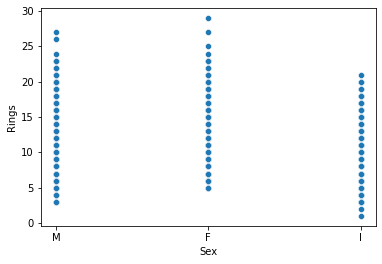

In [7]:
import seaborn as sns
sns.scatterplot(x="Sex",y="Rings",data=df)

<AxesSubplot:xlabel='Length', ylabel='Rings'>

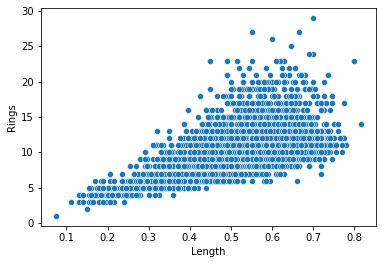

In [8]:
import seaborn as sns
sns.scatterplot(x="Length",y="Rings",data=df)

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

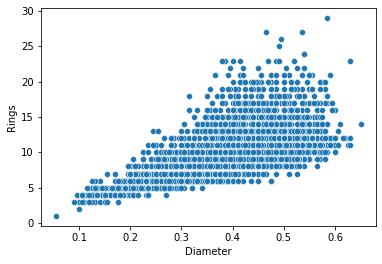

In [9]:
import seaborn as sns
sns.scatterplot(x="Diameter",y="Rings",data=df)

<AxesSubplot:xlabel='Height', ylabel='Rings'>

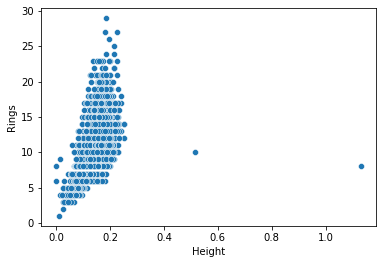

In [10]:
import seaborn as sns
sns.scatterplot(x="Height",y="Rings",data=df)

<AxesSubplot:xlabel='Whole weight', ylabel='Rings'>

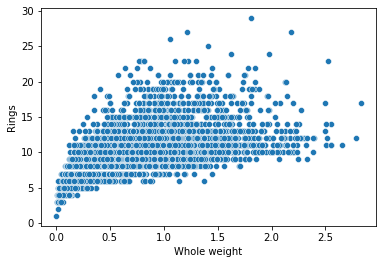

In [11]:
import seaborn as sns
sns.scatterplot(x="Whole weight",y="Rings",data=df)

<AxesSubplot:xlabel='Shucked weight', ylabel='Rings'>

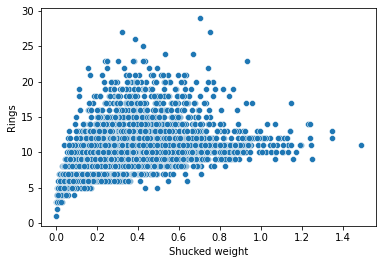

In [12]:
import seaborn as sns
sns.scatterplot(x="Shucked weight",y="Rings",data=df)

<AxesSubplot:xlabel='Viscera weight', ylabel='Rings'>

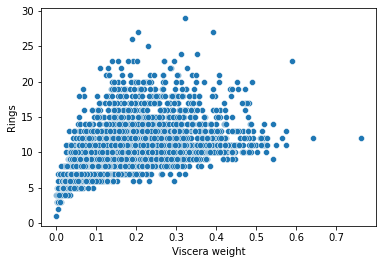

In [13]:
import seaborn as sns
sns.scatterplot(x="Viscera weight",y="Rings",data=df)

<AxesSubplot:xlabel='Shell weight', ylabel='Rings'>

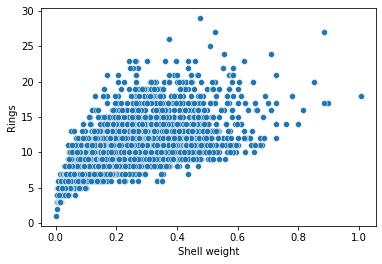

In [14]:
import seaborn as sns
sns.scatterplot(x="Shell weight",y="Rings",data=df)

### Label Encoding

Label Encoding is needed to convert 'Male','Female'and 'Infant' into 0,1 and 2 so that we can check the correlation.

In [15]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["Sex"]=LE.fit_transform(df["Sex"])
df["Sex"].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

### Correlation:

In [16]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


Correlation using heatmap:

<AxesSubplot:>

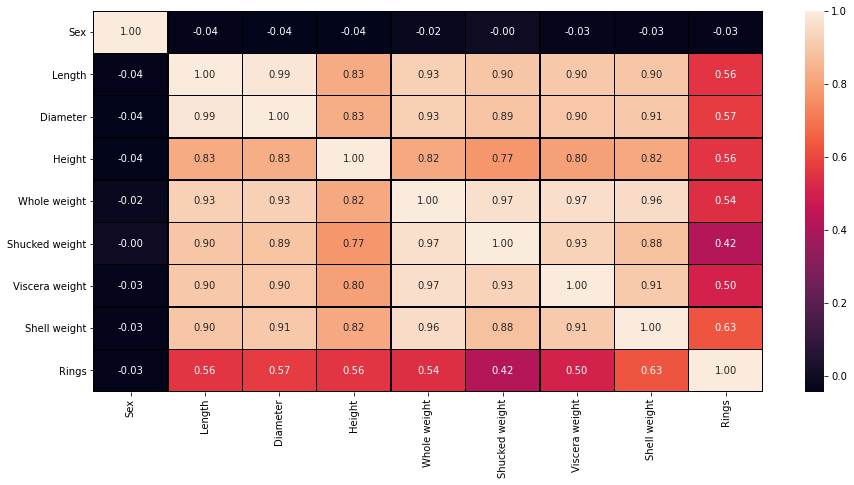

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')

Outcome of Correlation:

Sex has negative 3 percent with the target column which can be considered as a weak bond. Length has 56 percent with the target column which can be considered as a strong bond. Diameter has 57 percent with the target column which can be considered as a strong bond. Height has 56 percent with the target column which can be considered as a strong bond. Whole weight has 54 percent with the target column which can be considered as a strong bond. Shucked weight has 42 percent with the target column which can be considered as a good bond. Viscera weight has 50 percent with the target column which can be considered as a good bond. Shell weight has 63 percent with the target column which can be considered as a strong bond.


Max correlation: Shell weight

Min correlation: Sex

### Describing Datasets:

In [18]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<function matplotlib.pyplot.show(close=None, block=None)>

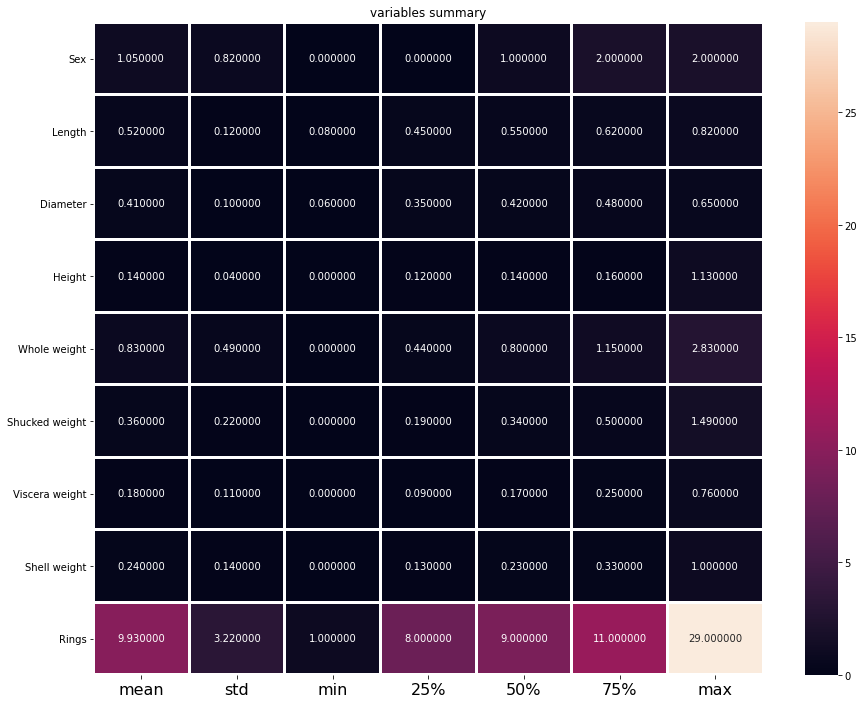

In [19]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=16)
plt.yticks(fontsize=10)
plt.title("variables summary")
plt.show

Outcome of describe of datasets:

From the above plotting we are determining mean, standard deviation, minimum and maximum value of each column. It helps us further in data cleaning.

Total Number of rows in datasets:

1. 4177 rows
2. 9 columns

Sex:

1. Mean= 1.052909
2. Std= 0.822240
3. Max_value= 2
4. Min_value= 0

Length:

1. Mean= 0.523992
2. Std= 0.120093
3. Max_value= 0.815000
4. Min_value= 0.075000

Diameter:

1. Mean= 0.407881
2. Std= 0.099240
3. Max_value= 0.650000
4. Min_value= 0.055000

Height:

1. Mean= 0.139516
2. Std= 0.041827
3. Max_value= 1.130000
4. Min_value= 0

Whole weight:

1. Mean= 0.828742
2. Std= 0.490389
3. Max_value= 2.825500
4. Min_value= 0.002000

Shucked weight:

1. Mean= 0.359367
2. Std= 0.221963
3. Max_value= 1.488000
4. Min_value= 0.001000

Viscera weight:
    
1. Mean= 0.180594
2. Std= 0.109614
3. Max_value= 0.760000
4. Min_value= 0.000500

Shell weight:
    
1. Mean= 0.238831
2. Std= 0.139203
3. Max_value= 1.005000
4. Min_value= 0.001500

Rings:
    
1. Mean= 9.933684
2. Std= 3.224169
3. Max_value= 29.000000
4. Min_value= 1

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int32  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 277.5 KB


From the above code we can have the column datatype and memory used by the dataframe.

### Outliers Checking:

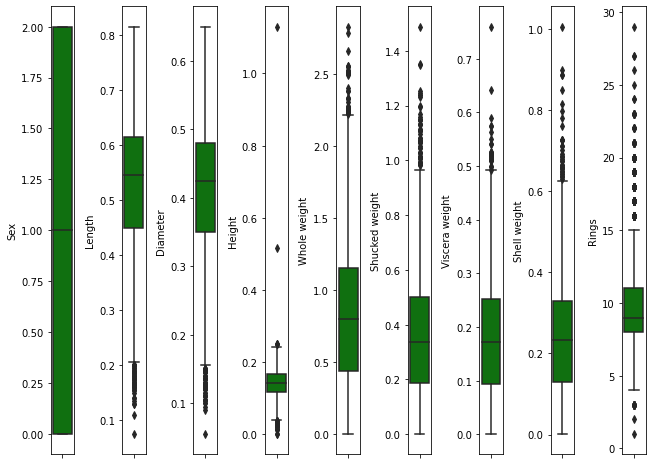

In [21]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=df[collist[i]],color='green',orient='v')
    plt.tight_layout()

From the above outcome we can see that column['Sex'] has no outliers and rest all the columns have more outliers.

### Skewness:

In [22]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

### Data Cleaning:

In [25]:
delete=pd.DataFrame([["0.034627","Sex","No"]],columns=["Correlation with Target","Column Name","Outliers"])
delete

,Correlation with Target,Column Name,Outliers
0,0.034627,Sex,No


In [27]:
df_new=df.drop(columns=['Sex'],axis=1)

In [28]:
df_new

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### Removing Outliers:

Z-Score Technique:

In [29]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df_new))
z.shape

(4177, 8)

In [30]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [31]:
df_new1=df_new[(z<3).all(axis=1)]
print(df_new.shape)
print(df_new1.shape)

(4177, 8)
(4027, 8)


Percentage Data Loss:

In [32]:
loss_percent=(158-152)/158*100
print(loss_percent)

3.79746835443038


Checking whether how much outliers are still there.If the outliers there help in testing the model or not.

### Model without outliers is df_new amd model with desired outliers is df_new1:

Dividing data in features and vectors:

In [33]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

### Transforming data to remove skewness:

In [34]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [35]:
x

array([[-0.68550213, -0.54986033, -1.12451192, ..., -0.54098937,
        -0.69328289, -0.587809  ],
       [-1.39634403, -1.38733299, -1.26439579, ..., -1.31166208,
        -1.33295268, -1.33241968],
       [-0.07077438,  0.00853714, -0.06482301, ..., -0.36611642,
        -0.25513514, -0.09826193],
       ...,
       [ 0.59336612,  0.64519089,  1.56508168, ...,  0.83813658,
         1.01560749,  0.59839786],
       [ 0.85337516,  0.76992788,  0.30708344, ...,  0.85873857,
         0.81518436,  0.51914542],
       [ 1.83447784,  1.72628889,  1.34794324, ...,  2.10364827,
         1.61134422,  1.65848824]])

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.68550213, -0.54986033, -1.12451192, ..., -0.54098937,
        -0.69328289, -0.587809  ],
       [-1.39634403, -1.38733299, -1.26439579, ..., -1.31166208,
        -1.33295268, -1.33241968],
       [-0.07077438,  0.00853714, -0.06482301, ..., -0.36611642,
        -0.25513514, -0.09826193],
       ...,
       [ 0.59336612,  0.64519089,  1.56508168, ...,  0.83813658,
         1.01560749,  0.59839786],
       [ 0.85337516,  0.76992788,  0.30708344, ...,  0.85873857,
         0.81518436,  0.51914542],
       [ 1.83447784,  1.72628889,  1.34794324, ...,  2.10364827,
         1.61134422,  1.65848824]])